In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Add, Concatenate, Subtract
from tensorflow.keras.utils import plot_model

# model.summary()
# plot_model( model, to_file = 'model.jpg', show_shapes=True )

1. 실습

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_15 (InputLayer)          [(None, 1024)]       0           []                               
                                                                                                  
 dense_26 (Dense)               (None, 128)          131200      ['input_15[0][0]']               
                                                                                                  
 input_16 (InputLayer)          [(None, 10)]         0           []                               
                                                                                                  
 dense_27 (Dense)               (None, 64)           8256        ['dense_26[0][0]']               
                                                                                            

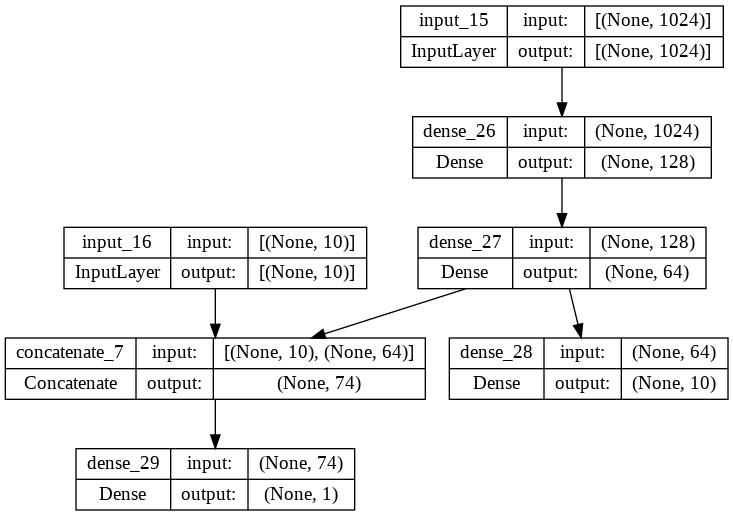

In [ ]:
main_input = Input(shape=(1024, ))
dense128 = Dense(128, activation='relu') (main_input)
dense64 = Dense(64, activation='relu') (dense128)
aux_input = Input(shape=(10,))
merge = Concatenate() ([aux_input, dense64])
aux_output = Dense(10, activation='relu') (dense64)
main_output = Dense(1, activation='relu') (merge)
model = Model(inputs = [main_input, aux_input], outputs = [main_output,aux_output])

model.summary()
plot_model( model, to_file = 'model.jpg', show_shapes=True )

2. Inception Module

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 192  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_6 (Conv2D)              (None, 28, 28, 96)   18528       ['input_2[0][0]']                
                                                                                                  
 conv2d_7 (Conv2D)              (None, 28, 28, 16)   3088        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_1 (MaxPooling2D)  (None, 28, 28, 192)  0          ['input_2[0][0]']            

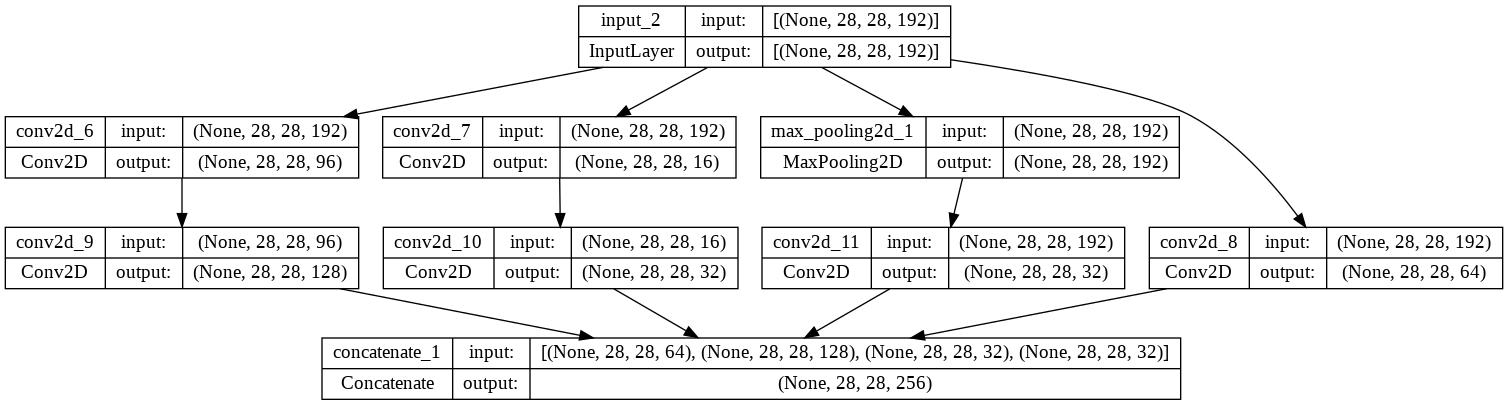

In [5]:
Pevious_Activation = Input(shape=(28, 28, 192))
#Conv2D(필터개수(output), 필터 사이즈,)
#conv 했는데 바뀌지 않으면 padding을 same으로 써야함
conv11 = Conv2D(96, kernel_size=(1,1), padding='same',activation='relu') (Pevious_Activation)
conv12 = Conv2D(16, kernel_size=(1,1), padding='same', activation='relu') (Pevious_Activation)
maxpool = MaxPooling2D(pool_size=(3,3), strides = 1, padding='same') (Pevious_Activation)

conv21 = Conv2D(64, kernel_size=(1,1), padding='same',activation='relu') (Pevious_Activation)
conv22 = Conv2D(128, kernel_size=(3,3), padding='same',activation='relu') (conv11)
conv23 = Conv2D(32, kernel_size=(5,5), padding='same',activation='relu') (conv12)
conv24 = Conv2D(32, kernel_size=(1,1), padding='same',activation='relu') (maxpool)
channel_concat = Concatenate() ([conv21, conv22, conv23, conv24])
model = Model(inputs = [Pevious_Activation], outputs = [channel_concat])

model.summary()
plot_model( model, to_file = 'model.jpg', show_shapes=True )

3. Residual Module

Model: "model_7"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_29 (InputLayer)          [(None, 32, 32, 256  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_33 (Conv2D)             (None, 32, 32, 64)   16448       ['input_29[0][0]']               
                                                                                                  
 conv2d_34 (Conv2D)             (None, 32, 32, 64)   36928       ['conv2d_33[0][0]']              
                                                                                                  
 conv2d_35 (Conv2D)             (None, 32, 32, 256)  16640       ['conv2d_34[0][0]']        

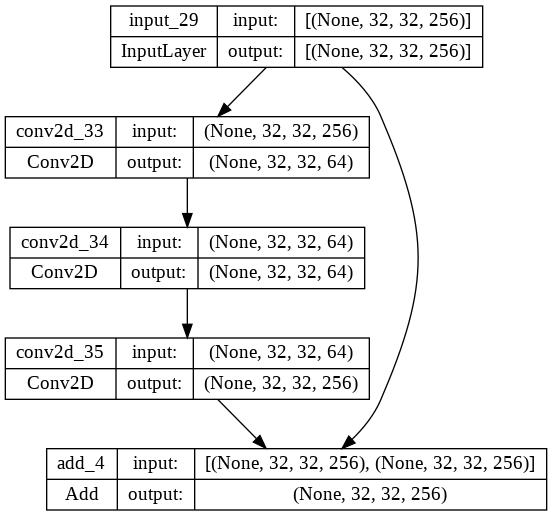

In [ ]:
input = Input(shape=(32,32,256))

conv1 = Conv2D(64, kernel_size=(1,1), padding='same', activation='relu') (input)
conv2 = Conv2D(64, kernel_size=(3,3), padding='same', activation='relu') (conv1)
conv3 = Conv2D(256, kernel_size=(1,1), padding='same', activation='relu') (conv2)

output = Add()([input, conv3])

model = Model(inputs = [input], outputs = [output])

model.summary()
plot_model( model, to_file = 'model.jpg', show_shapes=True )

4. Siamese Network

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_38 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 input_39 (InputLayer)          [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv2d_40 (Conv2D)             (None, 32, 32, 16)   448         ['input_38[0][0]',               
                                                                  'input_39[0][0]']               
                                                                                                  
 subtract_1 (Subtract)          (None, 32, 32, 16)   0           ['conv2d_40[0][0]',       

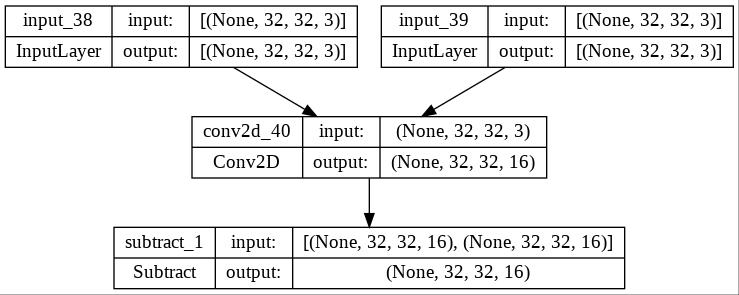

In [ ]:
a = Input(shape=(32, 32, 3))
b = Input(shape=(32, 32, 3))

# 동일한 weight를 적용시키고 싶으면 임의의 conv를 하나 만듦
conv = Conv2D(16, kernel_size=(3,3), padding='same', activation='relu')

s1 = conv(a)
s2 = conv(b)
output = Subtract()([s1, s2])

model = Model(inputs = [a,b], outputs = [output])

model.summary()
plot_model( model, to_file = 'model.jpg', show_shapes=True )